# Example 1: Load data

## Load example data from matfile and convert to physical units

In [2]:
from scipy.io import loadmat

datadir = '../example data/'
datasets = [
    'r2405_051216b_cell1816.mat',
    'R11_20190607_EC_02.mat'
]

# Retrieve data from file
data = loadmat(datadir+datasets[1],squeeze_me=True)
xy_position_pixels   = data['xy']
heading_degrees      = data['dir']
position_sample_rate = data['pos_sample_rate']
pixels_per_meter     = data['pixels_per_m']
spike_times_samples  = data['spikes_times']
spike_sample_rate    = data['spk_sample_rate']
# Convert units
dt                   = 1 / position_sample_rate
xy_position_meters   = xy_position_pixels / pixels_per_meter 
spike_times_seconds  = spike_times_samples / spike_sample_rate
NSPIKES              = len(spike_times_samples)
NSAMPLES             = len(heading_degrees)

## Plot binned data

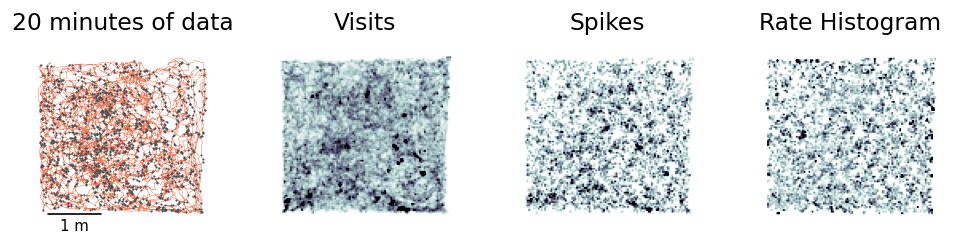

In [7]:
import sys
sys.path.append('../')
from lgcpspatial.load_data import bin_spikes, Dataset
from lgcpspatial.plot import *

data = Dataset.from_file(datadir+datasets[1])
L    = 128
N,K  = bin_spikes(data.px,data.py,data.spikes,L)

figure(figsize=(8,2),dpi=120)
subplots_adjust(left=-0.01,bottom=0.05,right=1,top=.9,wspace=0)

subplot(141)
TSHOW = 60*20 # seconds
plot(*xy_position_meters[:int(position_sample_rate*TSHOW)].T,lw=0.3,color=RUST,zorder=0)
axis('square')
xscalebar(0.8,1.0,'1 m',y=0)
scatter(*xy_position_meters[int32(position_sample_rate*spike_times_seconds[spike_times_seconds<TSHOW])].T,zorder=1,lw=0,s=1.5)
xlim(*data.extent[:2])
ylim(*data.extent[2:])
title('20 minutes of data',pad=0,fontsize=14)
noxyaxes()

subplot(142)
imshow(N,vmin=0,vmax=percentile(N,99),cmap='bone_r',extent=data.extent)
title('Visits',pad=0,fontsize=14)
noxyaxes()

subplot(143)
imshow(K,vmin=0,vmax=percentile(K,99),cmap='bone_r',extent=data.extent)
title('Spikes',pad=0,fontsize=14)
noxyaxes()

subplot(144)
Y = K/maximum(1,N)
Y[N<=0]=0
imshow(Y,vmin=0,vmax=percentile(Y,99),cmap='bone_r',extent=data.extent)
title('Rate Histogram',pad=0,fontsize=14)
noxyaxes()

savefig('binned_data_example.svg')
savefig('binned_data_example.pdf')

## Use `Dataset.prepare` to inspect data and guess grid-cell period

The `Dataset.prepare` function loads a dataset, downsamples spike times, and bins spikes to a $L\times L$ spatial grid. It also tries to estimate the grid-cell's period using the radial autocorrelogram.

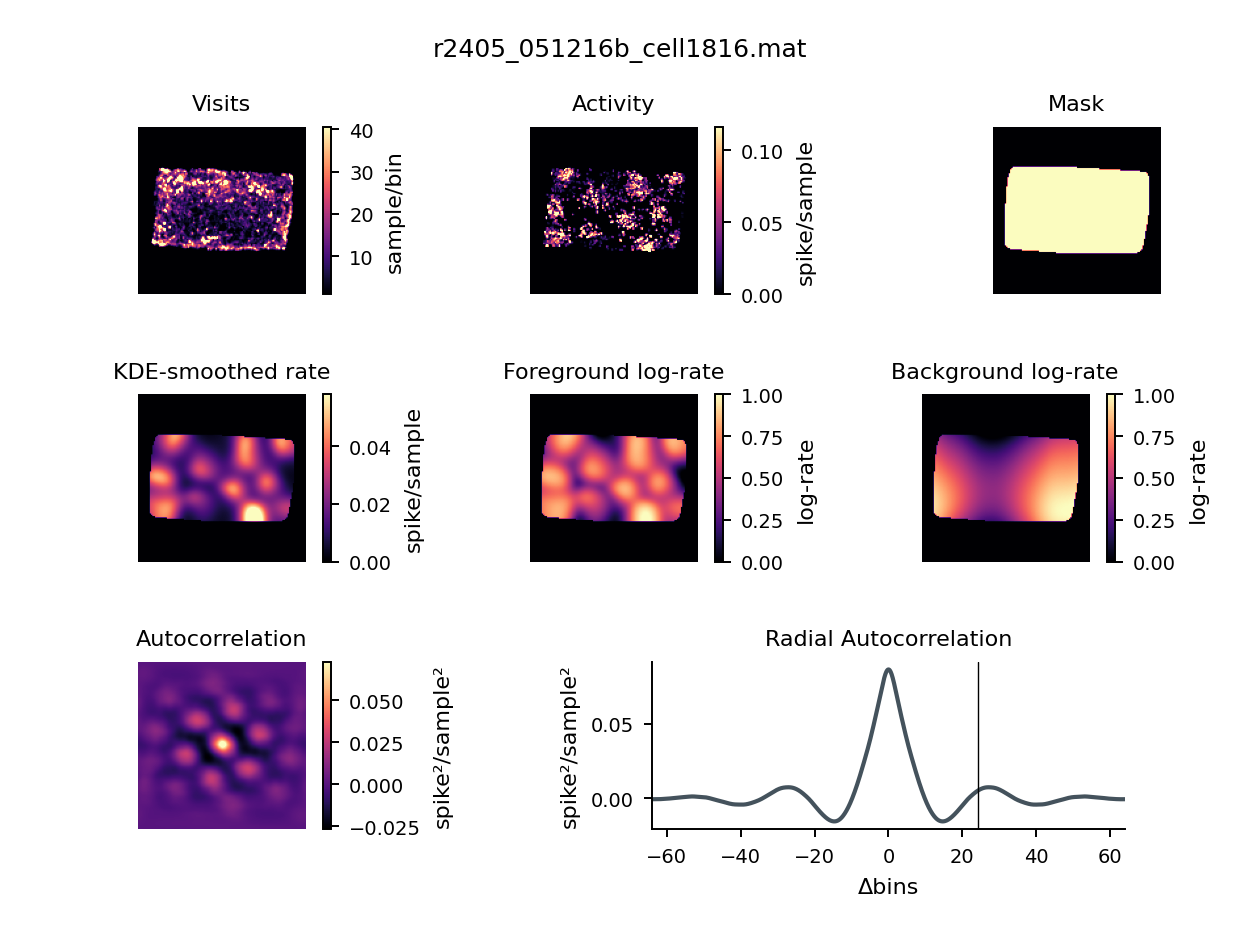

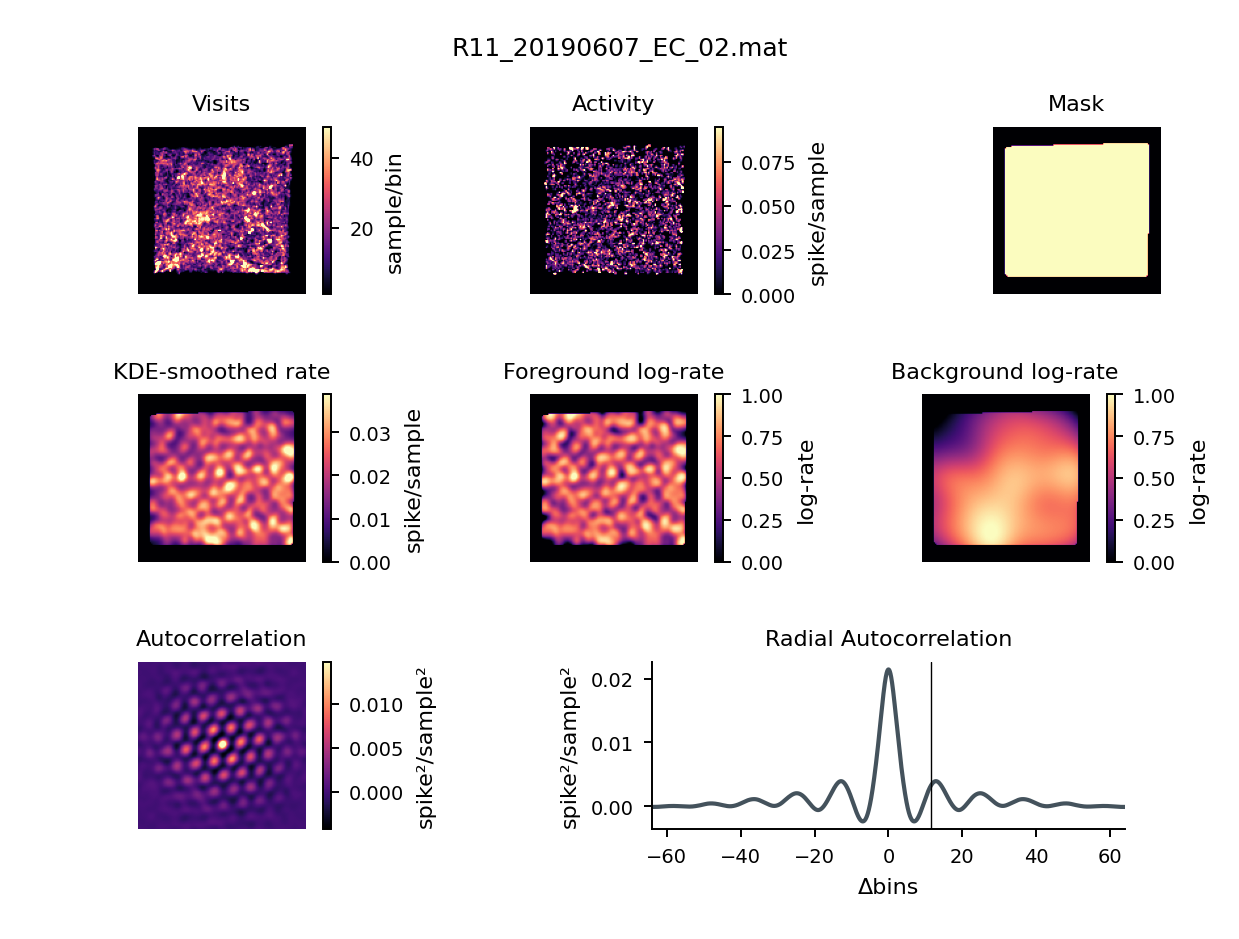

In [8]:
L       = 128 # Grid size for position bins
padding = 0.1 # Edge padding (Avoids circular convolution wrap-around)
Dataset.from_file(datadir+datasets[0],padding).prepare(L,doplot=True)
Dataset.from_file(datadir+datasets[1],padding).prepare(L,doplot=True);